# DecisionTrees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## OOP in python

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x1aab17371d0>, <__main__.Node at 0x1aab17373d0>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 21 features and the class:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
1. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
1. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
1. bruises: bruises=t,no=f
1. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
1. gill-attachment: attached=a,descending=d,free=f,notched=n
1. gill-spacing: close=c,crowded=w,distant=d
1. gill-size: broad=b,narrow=n
1. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
1. stalk-shape: enlarging=e,tapering=t
1. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
1. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
1. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
1. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
1. veil-type: partial=p,universal=u
1. veil-color: brown=n,orange=o,white=w,yellow=y
1. ring-number: none=n,one=o,two=t
1. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
1. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
1. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
1. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [5]:
data = data.dropna(axis=1)

Split the dataset to `training` and `test` sets.

In [6]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


## Impurity Measures

In [ ]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns:
    - gini: The gini impurity value.
    """
    gini = 0.0
    df = pd.DataFrame(data = data)
    df = df[df.columns[-1]]
    uniqe_values = np.unique(df , return_counts = True)[1]
    gini = 1
    total = 0 #this is the denominator
    for value in uniqe_values:
        total += value
    for value in uniqe_values:
        gini -= (value/total)**2
    return gini

In [ ]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns:
    - entropy: The entropy value.
    """
    entropy = 0.0
    df = pd.DataFrame(data = data)
    df = df[df.columns[-1]]
    uniqe_values = np.unique(df , return_counts = True)[1]
    entropy = 0
    total = 0
    for value in uniqe_values:
        total += value
    for value in uniqe_values:
        entropy -= (value/total)*(np.log2(value/total))
    return entropy

In [8]:
#Tests
calc_gini(X), calc_entropy(X)

(0.49956363223797745, 0.9993703627906085)

## Goodness of Split

In [9]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.
    Note: Python support passing a function as arguments to another function
    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index the split is being evaluated according to.
    - impurity_func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns:
    - goodness: the goodness of split value
    - groups: a dictionary holding the data after splitting 
              according to the feature values.
    """
    goodness = 0
    groups = {} 
    df = pd.DataFrame(data=data)
    features_list = list(df.head())
    feature_to_calculate = features_list[feature]
    
    attribute_val = list(np.array(np.unique(df[feature_to_calculate])))
    
    if(not gain_ratio):
        goodness = impurity_func(df)

        for val in attribute_val:
            df_val = df.loc[df[feature_to_calculate]==val]
            val_ratio = ((len(df_val))/(len(data)))
            goodness -= val_ratio*impurity_func(df_val)
            groups[val] = df_val
            
    else:
        info_gain = calc_entropy(df)
        split_in_info = 0
        
        for val in attribute_val:
            df_val = df.loc[df[feature_to_calculate]==val]
            count_val = len(df_val)
            val_ratio = (count_val/len(data))
            groups[val] = df_val
            
            if (val_ratio < 1): 
                info_gain -= (val_ratio)*(calc_entropy(df_val))#val_ratio = Sv/S, phi(Sv)
                split_in_info -= (val_ratio)*np.log2(val_ratio)
                goodness = info_gain/split_in_info
            else:
                goodness = 0
    return goodness, groups

In [10]:
#Checking the goodness of split
goodness_gini, split_values_gini = goodness_of_split(X, 0, calc_gini)
goodness_entropy, split_values_entropy = goodness_of_split(X, 0, calc_entropy)

goodness_gini, goodness_entropy

(0.019959657834442174, 0.030727291723502304)

## Building a Decision Tree

In [11]:
class DecisionNode:

    def __init__(self, data, feature=-1,depth=0, chi=1, max_depth=1000, gain_ratio=False):
        
        self.data = data # the relevant data for the node
        self.feature = feature # column index of criteria being tested
        self.pred = self.calc_node_pred() # the prediction of the node
        self.depth = depth # the current depth of the node
        self.children = [] # array that holds this nodes children
        self.children_values = []
        self.terminal = False # determines if the node is a leaf
        self.chi = chi 
        self.max_depth = max_depth # the maximum allowed depth of the tree
        self.gain_ratio = gain_ratio 
    
    def calc_node_pred(self):
        """
        Calculate the node prediction.

        Returns:
        - pred: the prediction of the node
        """
        pred = None
        df = pd.DataFrame(data = self.data)
        df = df[df.columns[-1]]
  
        unique_values = np.unique(df, return_counts = True)[0]
        unique_values_counts = np.unique(df, return_counts = True)[1]

        if(len(unique_values_counts) > 1):
            if(unique_values_counts[0] >= unique_values_counts[1]):
                pred = unique_values[0]
            else:
                pred = unique_values[1]
        else:
            pred = unique_values[0]
        return pred
        
    def add_child(self, node, val):
        """
        Adds a child node to self.children and updates self.children_values

        This function has no return value
        """
        self.children.append(node)
        self.children_values.append(val)
     
    def split(self, impurity_func):

        """
        Splits the current node according to the impurity_func. This function finds
        the best feature to split according to and create the corresponding children.
        This function should support pruning according to chi and max_depth.

        Input:
        - The impurity function that should be used as the splitting criteria

        This function has no return value
        """
        df = pd.DataFrame(data = self.data)
        best_goodness = 0
        best_goodness_index = 0
        best_goodness_groups = {}
        for feature in range(0,21):
            goodness, groups = goodness_of_split(df, feature, impurity_func, gain_ratio=self.gain_ratio)
            if(goodness > best_goodness):
                best_goodness = goodness #float
                best_goodness_groups = groups #dic(key:feature name ,value:df)
                best_goodness_index = feature #int of feature inex

        keys = best_goodness_groups.keys()

        for key in keys:
            child_node = DecisionNode(best_goodness_groups[key])
            child_node.depth = self.depth + 1
            child_node.gain_ratio = self.gain_ratio
            child_node.chi = self.chi
            self.add_child(child_node, key)
            
        #assigning the feature/column to the parent node    
        self.feature = best_goodness_index
        
        
    def chi_square_test(self, label, values):
        """
        calculate the chi value according to the formula.

        Input:
        - node: a node in the decision tree.
        - label?
        - values?

        Output: Chi value of node.
        """        
        sum_chi = 0
        count_label_p = 0
        count_label_e = 0

        #counting e and p in the current node
        df_classes = pd.DataFrame(data = self.data)
        uniq_classes = np.unique(df_classes[df_classes.columns[-1]] , return_counts = True)
        
        count_label_e, count_label_p = self.uniq_ep(uniq_classes)

        prob_e = count_label_e/sum(uniq_classes[1])
        prob_p = count_label_p/sum(uniq_classes[1])

        for index,lab in enumerate(label):
            df_label_in_node = values[index]

            dataframe_lab = self.data.loc[self.data[self.data.columns[self.feature]] == lab]
            uniq_class_lab = np.unique(dataframe_lab[dataframe_lab.columns[-1]] , return_counts = True)

            pf,nf = self.uniq_ep(uniq_class_lab)

            e0 = (df_label_in_node*prob_e)
            e1 = (df_label_in_node*prob_p)
            
            if (e0 == 0 or e1 == 0):
                return 0
            
            sum_chi += (np.square(pf - e0) / e0) + (np.square(nf - e1) / e1)
        
        return sum_chi

    def uniq_ep(self, uni):
        if(len(uni[0]) == 1):            
            if(uni[0][0] == 'e'):
                count_e = uni[1][0]
                count_p = 0
            else:
                count_e = 0
                count_p = uni[1][0]
        else:
            count_e = uni[1][0]
            count_p = uni[1][1]
        return [count_e,count_p]
    
    def tree_depth(self):
        if len(self.children) == 0:
            return 0
        depth = []
        for child in self.children:
            depth.append(child.tree_depth())
            
        return np.max(depth) + 1

In [ ]:
def build_tree(data, impurity, gain_ratio=False, chi=1, max_depth=1000):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure unless
    you are using pruning

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag

    Output: the root node of the tree.
    """
    root = None
    df = pd.DataFrame(data = data)
    nodes_queue = []
    
    #creating the root node
    root = DecisionNode(df)
    root.chi = chi
    
    if (gain_ratio == True):
        root.gain_ratio = True
        
    root.split(impurity)
    for child in root.children:
        nodes_queue.append(child)
    
    while(len(nodes_queue)>0):
        node = nodes_queue.pop()
        if (node.depth < max_depth and node.chi == 1):
            node.split(impurity)
            for i in node.children:
                nodes_queue.append(i)
        elif (node.depth < max_depth and node.chi != 1):
            
            best_goodness = 0
            best_goodness_index = 0
            for feature in range(0,21):
                goodness, groups = goodness_of_split(node.data, feature, impurity, gain_ratio=node.gain_ratio)
                if(goodness > best_goodness):
                    best_goodness = goodness #float
                    best_goodness_index = feature #int of feature inex
            
        
        
            node.feature = best_goodness_index
            df_of_feature = node.data[node.data.columns[best_goodness_index]]
            uniq_label = np.unique(df_of_feature , return_counts = True)[0]
            uniq_value = np.unique(df_of_feature , return_counts = True)[1]    
            curr_chi_val = node.chi_square_test(uniq_label, uniq_value)
                
            if (curr_chi_val != 0 and curr_chi_val >= chi_table[len(uniq_label)-1][chi]):
                node.split(impurity)
                for i in node.children:
                    nodes_queue.append(i)
    return root

In [12]:
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

complete


## Tree evaluation

In [13]:
def predict(root, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """    
    pred = None
    branch_to_traverse = instance[root.feature] #value of the feature
    child_index = root.children_values.index(branch_to_traverse)
    new_root = root.children[child_index]
    
    while(len(new_root.children) != 0):
        branch_to_traverse = instance[new_root.feature] #value of the feature

        if branch_to_traverse in new_root.children_values:
            child_index = new_root.children_values.index(branch_to_traverse)
            new_root = new_root.children[child_index]
        else:
            break
    #getting the prediction of the node
    pred = new_root.pred
    return pred


In [ ]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree and calculate the accuracy
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    true_count = 0
    df = pd.DataFrame(data = dataset)
    for row_index in range(len(df)):
        instance = df.iloc[row_index]
        pred_instance = predict(node, instance)
        if(pred_instance == instance[len(instance)-1]):
            true_count = true_count + 1
   
    accuracy = (true_count/len(df))*100 
    return accuracy

In [14]:
#Accuracy tests
print('gini', calc_accuracy(tree_gini, X_train), calc_accuracy(tree_gini, X_test))
print('entropy', calc_accuracy(tree_entropy, X_train), calc_accuracy(tree_entropy, X_test))
print('entropy gain ratio', calc_accuracy(tree_entropy_gain_ratio, X_train), 
      calc_accuracy(tree_entropy_gain_ratio, X_test))

gini 99.24503528639423 77.5480059084195
entropy 99.40915805022156 77.30182176267849
entropy gain ratio 99.63892991957984 78.58197932053176


## Depth pruning

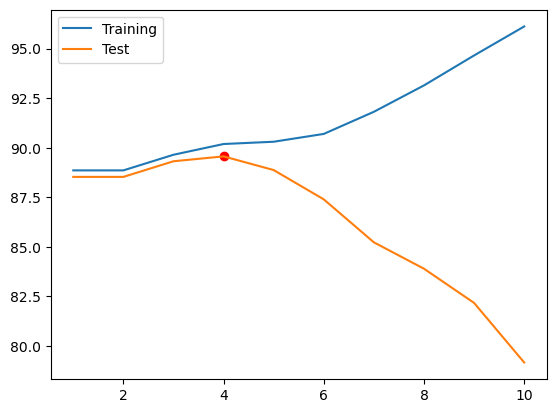

In [15]:
def depth_pruning(X_train, X_test):
    """
    Calculate the training and testing accuracies for different depths
    using the best impurity function and the gain_ratio flag you got
    previously.

    Input:
    - X_train: the training data where the last column holds the labels
    - X_test: the testing data where the last column holds the labels
 
    Output: the training and testing accuracies per max depth
    """
    training = []
    testing  = []
    
    for max_depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        
        tree_root = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, chi=1, max_depth=max_depth)
        training.append(calc_accuracy(tree_root, X_train))
        testing.append(calc_accuracy(tree_root, X_test))
    return training, testingfrom 


depth_training_acc, depth_testing_acc = depth_pruning(X_train, X_test)
plt.plot(range(1, 11), depth_training_acc, label='Training')
plt.plot(range(1, 11), depth_testing_acc, label='Test')
plt.scatter(np.argmax(depth_testing_acc)+1, max(depth_testing_acc), c='r')
plt.legend();

## Chi square pre-pruning

In [16]:
def chi_pruning(X_train, X_test):

    """
    Calculate the training and testing accuracies for different chi values
    using the best impurity function and the gain_ratio flag you got
    previously. 

    Input:
    - X_train: the training data where the last column holds the labels
    - X_test: the testing data where the last column holds the labels
 
    Output:
    - chi_training_acc: the training accuracy per chi value
    - chi_testing_acc: the testing accuracy per chi value
    - depths: the tree depth for each chi value
    """
    chi_training_acc = []
    chi_testing_acc  = []
    depth = []
    
    chi_for_tree = [1, 0.5, 0.25, 0.1, 0.05, 0.0001]
    
    for chi_val in chi_for_tree:
        
        tree_root = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, chi=chi_val, max_depth=1000)
        chi_training_acc.append(calc_accuracy(tree_root, X_train))
        chi_testing_acc.append(calc_accuracy(tree_root, X_test))
        depth.append(tree_root.tree_depth())
    return chi_training_acc, chi_testing_acc, depth

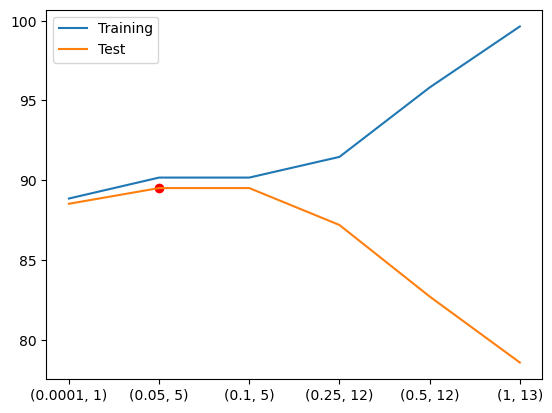

In [17]:
chi_training_acc, chi_testing_acc, depth = chi_pruning(X_train, X_test)

chi_depth_tuple = [str((x, y)) for x, y in zip([1, 0.5, 0.25, 0.1, 0.05, 0.0001], depth)][::-1]
plt.plot(chi_depth_tuple, chi_training_acc[::-1], label='Training')
plt.plot(chi_depth_tuple, chi_testing_acc[::-1], label='Test')
plt.scatter(chi_depth_tuple[np.argmax(chi_testing_acc[::-1])], max(chi_testing_acc), c='r')
plt.legend();

In [18]:
# tree_max_depth - the best tree according to max_depth pruning
# tree_chi - the best tree according to chi square pruning
tree_max_depth = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, chi=1, max_depth=4)
tree_chi = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, chi=0.05, max_depth=1000)

## Print the tree

In [21]:
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    if node.terminal == False:
        if node.depth == 0:
            print('[ROOT, feature=X{}]'.format(node.feature))
        else:
            print('{}[X{}={}, feature=X{}], Depth: {}'.format(depth*'  ', parent_feature, feature_val, 
                                                              node.feature, node.depth))
        for i, child in enumerate(node.children):
            print_tree(child, depth+1, node.feature, node.children_values[i])
    else:
        classes_count = {}
        labels, counts = np.unique(node.data[:, -1], return_counts=True)
        for l, c in zip(labels, counts):
            classes_count[l] = c
        print('{}[X{}={}, leaf]: [{}], Depth: {}'.format(depth*'  ', parent_feature, feature_val,
                                                         classes_count, node.depth))

In [22]:
print_tree(tree_max_depth)

[ROOT, feature=X4]
  [X4=a, feature=X2], Depth: 1
    [X2=n, feature=X8], Depth: 2
      [X8=n, feature=X19], Depth: 3
        [X19=s, feature=X-1], Depth: 4
        [X19=y, feature=X-1], Depth: 4
      [X8=p, feature=X0], Depth: 3
        [X0=f, feature=X-1], Depth: 4
        [X0=x, feature=X-1], Depth: 4
      [X8=w, feature=X18], Depth: 3
        [X18=k, feature=X-1], Depth: 4
        [X18=n, feature=X-1], Depth: 4
    [X2=w, feature=X6], Depth: 2
      [X6=c, feature=X8], Depth: 3
        [X8=g, feature=X-1], Depth: 4
        [X8=k, feature=X-1], Depth: 4
        [X8=n, feature=X-1], Depth: 4
        [X8=w, feature=X-1], Depth: 4
      [X6=w, feature=X0], Depth: 3
    [X2=y, feature=X6], Depth: 2
      [X6=c, feature=X8], Depth: 3
        [X8=g, feature=X-1], Depth: 4
        [X8=k, feature=X-1], Depth: 4
        [X8=n, feature=X-1], Depth: 4
        [X8=p, feature=X-1], Depth: 4
        [X8=w, feature=X-1], Depth: 4
      [X6=w, feature=X0], Depth: 3
        [X0=f, feature=X-1], D

In [23]:
print_tree(tree_gini)

[ROOT, feature=X4]
  [X4=a, feature=X2], Depth: 1
    [X2=n, feature=X8], Depth: 2
      [X8=n, feature=X19], Depth: 3
        [X19=s, feature=X0], Depth: 4
          [X0=f, feature=X18], Depth: 5
            [X18=k, feature=X0], Depth: 6
            [X18=n, feature=X20], Depth: 6
              [X20=g, feature=X0], Depth: 7
              [X20=p, feature=X0], Depth: 7
          [X0=x, feature=X0], Depth: 5
        [X19=y, feature=X0], Depth: 4
      [X8=p, feature=X0], Depth: 3
        [X0=f, feature=X19], Depth: 4
          [X19=s, feature=X0], Depth: 5
          [X19=y, feature=X0], Depth: 5
        [X0=x, feature=X0], Depth: 4
      [X8=w, feature=X18], Depth: 3
        [X18=k, feature=X0], Depth: 4
          [X0=f, feature=X0], Depth: 5
          [X0=x, feature=X20], Depth: 5
            [X20=g, feature=X0], Depth: 6
            [X20=p, feature=X0], Depth: 6
        [X18=n, feature=X0], Depth: 4
    [X2=w, feature=X8], Depth: 2
      [X8=g, feature=X0], Depth: 3
        [X0=b, featu